# cf-python exercises 3

In [13]:
# import the cf package
import cf
import cfplot as cfp
%matplotlib inline

In [9]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
data = cf.read('IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
print(data)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


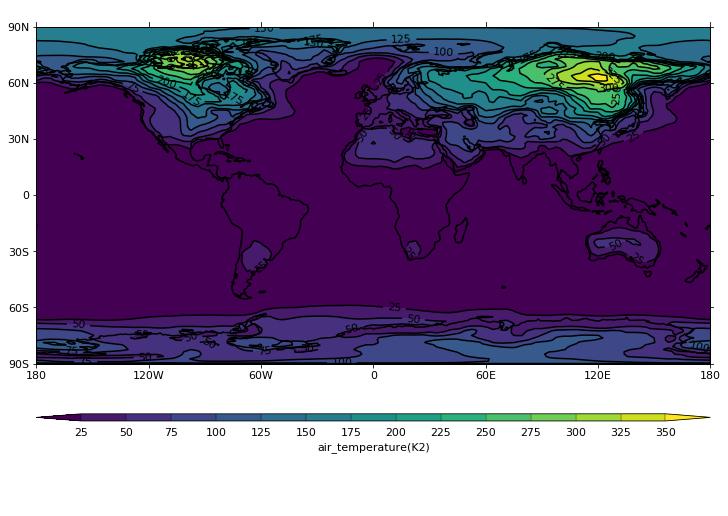

In [14]:
# Find the temporal variance at each XY location and plot the result
# (use the field's "collapse" method with the argument 'T: variance')
temp_var = data.collapse('variance', axes='T')
cfp.con(temp_var)

In [16]:
# Find the time mean at each X-Y point
# (use the field's "collapse" method wit the argument 'T: mean')
t_mean = data.collapse('mean', axes='T')

In [18]:
# Calculate the global mean for each time and print the values for the first 12 times
# (use specify the operation as 'X: Y: mean', or equivalently 'area: mean')
glob_mean = data.collapse('mean', axes=['X', 'Y'])
print(glob_mean.array[:12])

[[[275.14305112]]

 [[275.07955644]]

 [[275.08529227]]

 [[275.29717096]]

 [[276.82129897]]

 [[278.13823508]]

 [[279.43361836]]

 [[280.03470329]]

 [[279.58226719]]

 [[278.39334869]]

 [[276.5805792 ]]

 [[275.24783543]]]


In [19]:
# Calculate the weighted global mean for each time and print the valuesfor the first 12 times
# (use the "weights" parameter of the field's collapse method with the
# value ['X', 'Y'] or equivelently the value 'area')
weight_glob_mean = data.collapse('mean', axes=['X','Y'], weights=['X','Y'])

In [21]:
# For each time find the range spanned by the zonal means 
# (use the argument 'X: mean Y: range')
zon_mean_range = data.collapse('mean', 'X').collapse('range','Y')

TypeError: range() got an unexpected keyword argument 'inplace'

In [ ]:
# Find the temporal minimum of the latitudinal maxima of the longitudinal means 


## Calculate anomalies from the mean

In [22]:
# Find the time average at each X-Y location, weighted by month lengths
t_mean = data.collapse('mean', axes='T', weights='T')

In [26]:
# For each element of the original field, calculate the anomaly from the temporal mean
# and print its array of values 
# (use simple subtraction)
diff = data - t_mean
#print(diff.array)

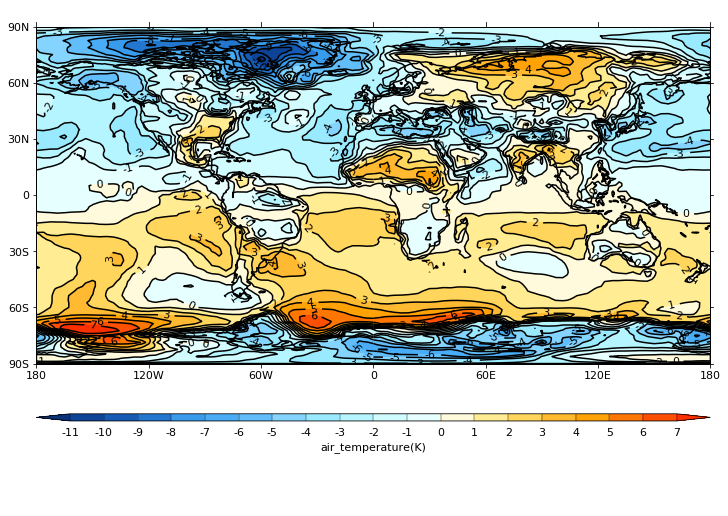

In [29]:
# Plot the anomaly from the mean for the month of April 1966
# (April 1966 may be specified as cf.month(4) & cf.year(1966))
cfp.con(diff.subspace(T=cf.month(4) & cf.year(1966)))

## Climatological time statistics

In [31]:
# Find the multiannual average of the seasonal (DJF, MAM, etc.) minima and plot the result for JJA 
# (use the special argument 'T: minimum within years T: mean over years' to the field's "collapse" method.
#  This also requires the "within_years" parameter to define over which periods to take the minima within each year.
#  Set this parameter to cf.seasons(), which will specify the four seasons of DJF, MAM, JJA, SON.
#
#  For example,
#
g = data.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())



In [37]:
# Print the new field's time cordinate values and their bounds - note that the bounds span the full 10 years,
# but the coordinate values themselves lie in the correct season of the first year
print(g.coord('T').dtarray)
print(g.coord('T').bounds.dtarray)

[cftime.DatetimeNoLeap(1960, 1, 15, 0, 0, 0, 0, 0, 15)
 cftime.DatetimeNoLeap(1960, 4, 16, 0, 0, 0, 0, 0, 106)
 cftime.DatetimeNoLeap(1960, 7, 17, 0, 0, 0, 0, 1, 198)
 cftime.DatetimeNoLeap(1960, 10, 16, 12, 0, 0, 0, 1, 289)]
[[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0, 4, 335)
  cftime.DatetimeNoLeap(1969, 3, 1, 0, 0, 0, 0, 5, 60)]
 [cftime.DatetimeNoLeap(1960, 3, 1, 0, 0, 0, 0, 3, 60)
  cftime.DatetimeNoLeap(1969, 6, 1, 0, 0, 0, 0, 6, 152)]
 [cftime.DatetimeNoLeap(1960, 6, 1, 0, 0, 0, 0, 4, 152)
  cftime.DatetimeNoLeap(1969, 9, 1, 0, 0, 0, 0, 0, 244)]
 [cftime.DatetimeNoLeap(1960, 9, 1, 0, 0, 0, 0, 5, 244)
  cftime.DatetimeNoLeap(1969, 12, 1, 0, 0, 0, 0, 0, 335)]]


## Cell methods: describing the variation of the quantity within cells

http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#cell-methods

In [38]:
# Inspect the original and new fields' cell methods, that describe the variation of the quantity within cells,
# i.e. a record of the collapses that have been performed
# (use the cell_methods attribute of the field)
print(data.cell_methods)

Constructs:
{'cellmethod0': <CF CellMethod: domainaxis0: mean (interval: 30 minutes)>}


## Cell areas and weights

Field: area (ncvar%tas)
-----------------------
Data            : area(latitude(145), longitude(192)) m2
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east



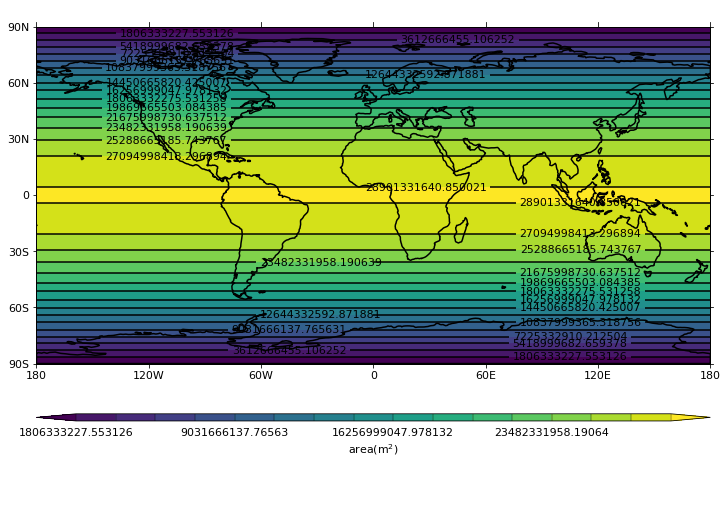

In [44]:
# Find and plot the horizontal cell areas of the field
# (use the field's "cell_area" method)
area = data.cell_area()
print(area)
cfp.con(area)

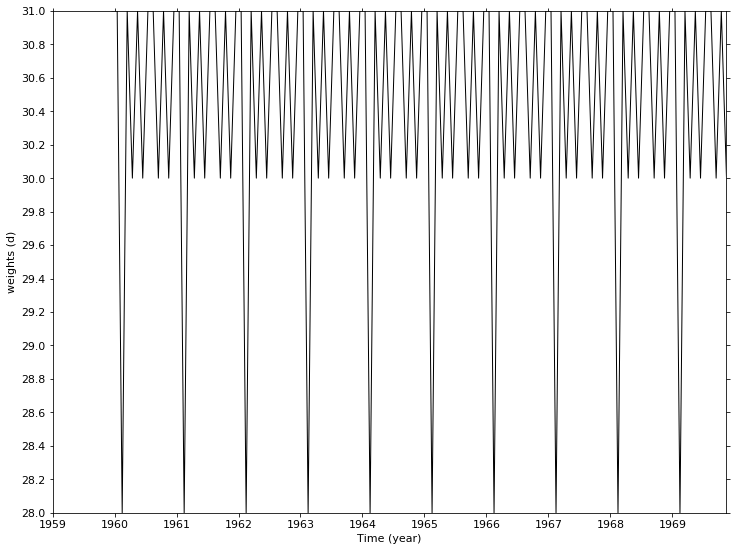

In [46]:
# Find the weights used in time axis collapses
# (use the field's weights method and the cfp.lineplot function on the result)
w_t = data.weights('T')
cfp.lineplot(w_t)

In [47]:
# Find the weights used in area collapses
# (use the field's weights method)
w_a = data.weights('area')

In [ ]:
# Look at the help page for the collapse method
